# Grade: /100 pts

# Assignment 7: Tree methods

In this assignment you'll study tree methods. You will use a dataset that contains the premier league (soccer) matches between 2010 and 2021. The data has the following variables:

|#|Attribute|Description|
|---|---|---|
|0|home_team|home team|
|1|away_team|away team|
|2|result_full|match result|
|3|home_clearances|home team clearances in the match|
|4|home_corners|home team corners in the match|
|5|home_fouls_conceded|home team fouls conceded in the match|
|6|home_offsides|home team offsides in the match|
|7|home_passes|home team passes in the match|
|8|home_possession|home team possession in the match|
|9|home_red_cards|home team red cards in the match|
|10|home_shots|home team shots in the match|
|11|home_shots_on_target|home team shots on target in the match|
|12|home_tackles|home team tackles in the match|
|13|home_touches|home team touches in the match|
|14|home_yellow_cards|home team yellow cards in the match|
|15|away_clearances|away tem clearances in the match|
|16|away_corners|away team corners in the match|
|17|away_fouls_concedevd|away team fouls conceded in the match|
|18|away_offsides|away team offsides in the match|
|19|away_passes|away team passes in the match|
|20|away_possession|away team possession in the match|
|21|away_red_cards|away team red cards in the match|
|22|away_shots|away team shots in the match|
|23|away_shots_on_target|away team shots on target in the match|
|24|away_tackles|away team tackles in the match|
|25|away_touches|away team touches in the match|
|26|away_yellow_cards|away team yellow cards in the match|
|27|clearances_avg_home|average home team clearances in the season; accumulated until the last match|
|28|corners_avg_home|average home team corners in the season; accumulated until the last match|
|29|fouls_conceded_avg_home|average home team fouls conceded in the season; accumulated until the last match|
|30|offsides_avg_home|average home team offsides in the season; accumulated until the last match|
|31|passes_avg_home|average home team passes in the season; accumulated until the last match|
|32|possession_avg_home|average home team possession in the season; accumulated until the last match|
|33|red_cards_avg_home|average home team red cards in the season; accumulated until the last match|
|34|shots_on_target_avg_home|average home team shots on target in the season; accumulated until the last match|
|35|tackles_avg_home|average home team tackles in the season; accumulated until the last match|
|36|touches_avg_home|average home team touches in the season; accumulated until the last match|
|37|yellow_cards_avg_home|average home team yellow cards in the season; accumulated until the last match|
|38|goals_scored_ft_avg_home|average home team goals scored in the season; accumulated until the last match|
|39|goals_conced_ft_avg_home|average home team goals conceded in the season; accumulated until the last match|
|40|sg_match_ft_acum_home|goals difference in the season; accumulated until the last match|
|41|goals_scored_ht_avg_home|average home team goals scored in 1st time in the season; accumulated until the last match|
|42|goals_conced_ht_avg_home|average home team goals conceded in 1st time in the season; accumulated until the last match|
|43|clearances_avg_away|average away team clearances in the season; accumulated until the last match|
|44|corners_avg_away|average away team corners in the season; accumulated until the last match|
|45|fouls_conceded_avg_away|average away team fouls conceded in the season; accumulated until the last match|
|46|offsides_avg_away|average away team offsides in the season; accumulated until the last match|
|47|passes_avg_away|average away team passes in the season; accumulated until the last match|
|48|possession_avg_away|average away team possession in the season; accumulated until the last match|
|49|red_cards_avg_away|average away team red cards in the season; accumulated until the last match|
|50|shots_on_target_avg_away|average away team shots on target in the season; accumulated until the last match|
|51|tackles_avg_away|average away team tackles in the season; accumulated until the last match|
|52|touches_avg_away|average away team touches in the season; accumulated until the last match|
|53|yellow_cards_avg_away|average away team yellow cards in the season; accumulated until the last match|
|54|goals_scored_ft_avg_away|average away team goals scored in the season; accumulated until the last match|
|55|goals_conced_ft_avg_away|average away team goals conceded in the season; accumulated until the last match|
|56|sg_match_ft_acum_away|goals difference in the season; accumulated until the last match|
|57|goals_scored_ht_avg_away|average away team goals scored in 1st time in the season; accumulated until the last match|
|58|goals_conced_ht_avg_away|average away team goals conceded in 1st time in the season; accumulated until the last match|

*Do not forget to include labels in your figures.*

*Take advantage of `n_jobs=-1` where applicable.*

# Some extra clarifications:

With this dataset, we aim to predict the outcome of the game. The outcome could be home, away, or draw. So we have a classification problem with three classes.

- Because we want to predict the outcome of the game, we cannot use the variables that were produced in the game, like passes, yellow and red cards, etc. So Q1.1 asks to drop those kinds of variables.

- To get the class of each game, you need to use the result (home goals - away goals) to identify who won the game or whether it was a draw (tie). To do that you need to transform the result column to get the home and away goals to compare. After you do that, those columns created in this step are no longer necessary and you will only keep the outcome of the game (0 if home won, 1 if away won, and 2 in case of a draw). So Q1.2 asks you to remove those columns (like home and away goals).

- Usually, we don’t want to include in the model highly correlated features (pairwise PCC >.9) because they give the same information (redundancy). So in Q1.3, you need to identify those features that are highly correlated and drop one of them from the original data frame. For example, if features x1 and x2 are highly correlated you have to drop either x1 or x2. In our case, we are keeping the ones that have a relation with possession.

### <span style="color:yellow"> Global Toolbox </span>

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sk 
from sklearn.model_selection import  train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import xgboost
print(xgboost.__version__)
from xgboost import XGBClassifier

import pydotplus 
from sklearn.tree import export_graphviz
from IPython.display import Image

import warnings; warnings.filterwarnings('ignore')
seed = 310
np.random.seed(seed)

1.7.4


### Q1.1 - <span style="color:red">[4]</span> - Load and clean the dataset:

1. Load the dataset.
2. Drop all the variables that you would not have known prior to the match, except for the goals.
3. Store the shape of the dataframe in a variable called <span style="color:pink">**shape_vector**</span>.

**Points will be deducted if your answer is not in the variable mentioned above**

In [60]:
df = pd.read_csv("PL_matches.csv")
df.drop(columns=list(df.iloc[:,3:27].columns), inplace=True)

shape_vector = df.shape
print(shape_vector)

(3957, 35)


### Q1.2 - <span style="color:red">[10]</span> - Create the target variable:

1. Create a new variable (column) in the dataset called "target", which will be the target for our classification. This variable will be "0" if the home team scored more goals than away team, "1" if the away scored more, and "2" if they scored the same number of goals. 
2. In which game was the greatest goal difference? What was the result of the game? Store the home team of the game in **home_team**, away in **away_team** and result in **game_result**.
3. Drop all variables related to the  result of the game including the name of the teams, except for the target.
4. **Written question:** Is this dataset balanced? Why? Write no more than 2 lines.

**Hint:** To create the target variable you should use the split function from pandas. Take a look to the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html)


**Points will be deducted if your answer is not in the variable names mentioned above**

In [61]:
df[["Home_g","Away_g"]] = df["result_full"].str.split("-",expand=True).astype(int)
df["target"] = df.apply(lambda x: 0 if (x["Home_g"]>x["Away_g"]) else (1 if (x["Away_g"]>x["Home_g"]) else 2),axis=1)

df["Goal_difference"] = np.abs(df["Home_g"]-df["Away_g"])

df_sorted = df.sort_values("Goal_difference",ascending=False).head(1)

home_team = df_sorted["home_team"].values[0]
away_team = df_sorted["away_team"].values[0]
game_result = df_sorted["result_full"].values[0]

print(f"The game with greatest goal difference is {home_team} - {away_team} with a result of {game_result}.")

df.drop(columns = ["home_team","away_team","Home_g","Away_g","result_full","Goal_difference"],inplace=True)

The game with greatest goal difference is Southampton - Leicester City with a result of 0-9.


In [62]:
df["target"].value_counts(normalize=True)

0    0.453626
1    0.300480
2    0.245893
Name: target, dtype: float64

**Written answer:** This dataset is not perfectly balanced because we have three categories and the presence of each category is not 33%. The category Home has over 45%.

### Q1.3 - <span style="color:red">[4]</span> - Correlation:

- Compute pairwise Pearson correlation coefficient (PCC) of columns and report only those with pairwise correlation absolute value greater than 0.9. The table below illustrates how the output of your code should look like. It is just for illustration and its number of rows (i.e., 3) is not deterministic. (We are checking pairwise correlations amongst the variables - and not each variable with respect to target.) 

|Index|Variable 1|Variable 2|PCC|
|---|---|---|---|
|137|passes_avg_home|possession_avg_home|0.935083|
|...|...|...|...|
|...|...|...|...|

  
- **Written question:** Using common sense and your understanding of the attributes, can you tell why are these variables correlated? Write no more than 5 sentences.

- In the pairwise PCCs, identify those variables without the term "possession" in their names and drop them from the dataframe.


In [63]:
correlations = df.corr().unstack().reset_index().rename(columns={"level_0": "variable_1", "level_1":"variable_2", 0:"correlation_coef"})
print(correlations[(np.abs(correlations["correlation_coef"])>0.9)&(correlations["correlation_coef"]!=1)])


df.drop(columns = ["passes_avg_home","touches_avg_home","passes_avg_away","touches_avg_away"], inplace=True)

              variable_1           variable_2  correlation_coef
137      passes_avg_home  possession_avg_home          0.935083
141      passes_avg_home     touches_avg_home          0.990809
169  possession_avg_home      passes_avg_home          0.935083
174  possession_avg_home     touches_avg_home          0.950461
301     touches_avg_home      passes_avg_home          0.990809
302     touches_avg_home  possession_avg_home          0.950461
681      passes_avg_away  possession_avg_away          0.934452
685      passes_avg_away     touches_avg_away          0.990702
713  possession_avg_away      passes_avg_away          0.934452
718  possession_avg_away     touches_avg_away          0.949458
845     touches_avg_away      passes_avg_away          0.990702
846     touches_avg_away  possession_avg_away          0.949458


**Answer:** The most correlated variables are the ones related to passes, touches, and possession. This happens because in order to have possession, the players have to pass the ball, and to pass the ball they have to touch it. So, the events are not independent. In fact one event could not happen if the other did not happen before (causality).

### Q2.1 - <span style="color:red">[40]</span> - Random Forest
- Separate the data into X and y, X should have the predictors and y the target

- Create train and test set with 30% of the data in the test set. Use the provided random seed.

- Instantiate three [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.get_params) each with a different method of selection for argument ```max_features```, *i.e.*, "sqrt", "log2", "None". Train them in a `for` loop with the number of trees in the range of 3 to 263 inclusive with step size of 20. Then, plot their OOB scores against number of trees in the forest for each classifier. Which selection method yields a better generalization score?

- Obtain the accuracy and the confusion matrix of the model with the best OOB rate. Store the accuracy in a variable called **accuracy1**.

- Visualize one arbitrary tree from one of the forests.

- **Written question:** Is this a good model? Write no more than 5 sentences.

**Points will be deducted if your answer is not in the variable names mentioned above.**

**Use random_state = seed in all the methods that take this argument.**

In [64]:
X = df.drop(columns = "target")
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed) 

In [65]:
min_estimators = 3
max_estimators = 263
stepsize = 20

len(np.linspace(3, 263, 20))

20

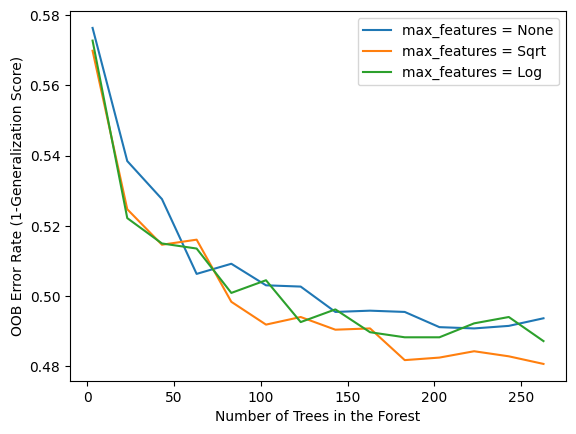

In [66]:
# Range of `n_estimators` values to explore.
ran_sqrt = RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=seed,
            n_jobs=-1)

ran_log = RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=seed,
            n_jobs=-1)

ran = RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=seed,
            n_jobs=-1)

min_estimators = 3
max_estimators = 263
stepsize = 20
r = range(min_estimators, max_estimators+1, stepsize)

nTrees = []
oob_error_sqrt = np.zeros(len(list(r)))
oob_error_log  = np.zeros(len(list(r)))
oob_error      = np.zeros(len(list(r)))

j=-1
for i in r:
    ran_sqrt.set_params(n_estimators=i)
    ran_sqrt.fit(X_train, y_train)

    ran_log.set_params(n_estimators=i)
    ran_log.fit(X_train, y_train)

    ran.set_params(n_estimators=i)
    ran.fit(X_train, y_train)

    # Record the OOB score (higher better) for each `n_estimators=i`
    nTrees.append(i)
    j+=1
    oob_error_sqrt[j]=ran_sqrt.oob_score_
    oob_error_log[j]=ran_log.oob_score_
    oob_error[j]=ran.oob_score_

plt.plot(nTrees,1-oob_error,label = "max_features = None") # (1-oob: lower better )
plt.plot(nTrees,1-oob_error_sqrt,label = "max_features = Sqrt")
plt.plot(nTrees,1-oob_error_log,label = "max_features = Log")
plt.xlabel('Number of Trees in the Forest')
plt.ylabel('OOB Error Rate (1-Generalization Score)')
plt.legend()
plt.show()

# The resulting plot shows that generalization error of "max_features=Sqrt" stabilizes to smaller values compared to "None" and "Log".

# FYI:
# From the documentation, for example, you can read that "max_features=None" means "max_features=n_features".
# In other words, at a split, the tree sees a subset of all available features.

In [67]:
clf = RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features=None,
            random_state=seed,
            n_jobs=-1).fit(X_train, y_train)

In [68]:
len(y_test)

1188

[[0.34 0.08 0.03]
 [0.12 0.15 0.04]
 [0.14 0.07 0.03]]


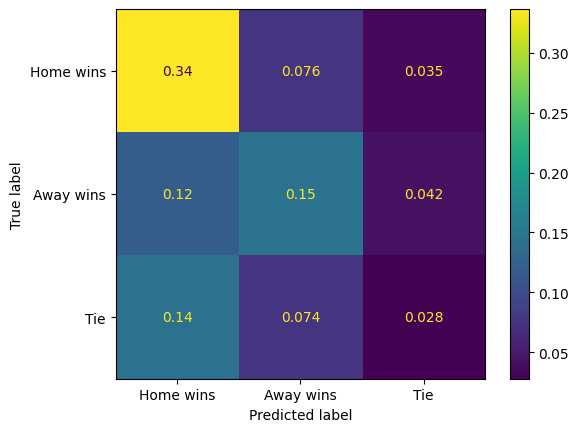

In [69]:
cm = confusion_matrix(y_true=y_test, y_pred=clf.predict(X_test))/len(y_test)  # "/len(y_test)" is to get them in percentage
print(cm.round(2))
# or
ConfusionMatrixDisplay(cm, display_labels = ['Home wins', 'Away wins', 'Tie']).plot()
plt.show()

In [70]:
accuracy1 = accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)) # i.e., some of the diagonal entries of the confusion matrix
accuracy1.round(2)

0.51

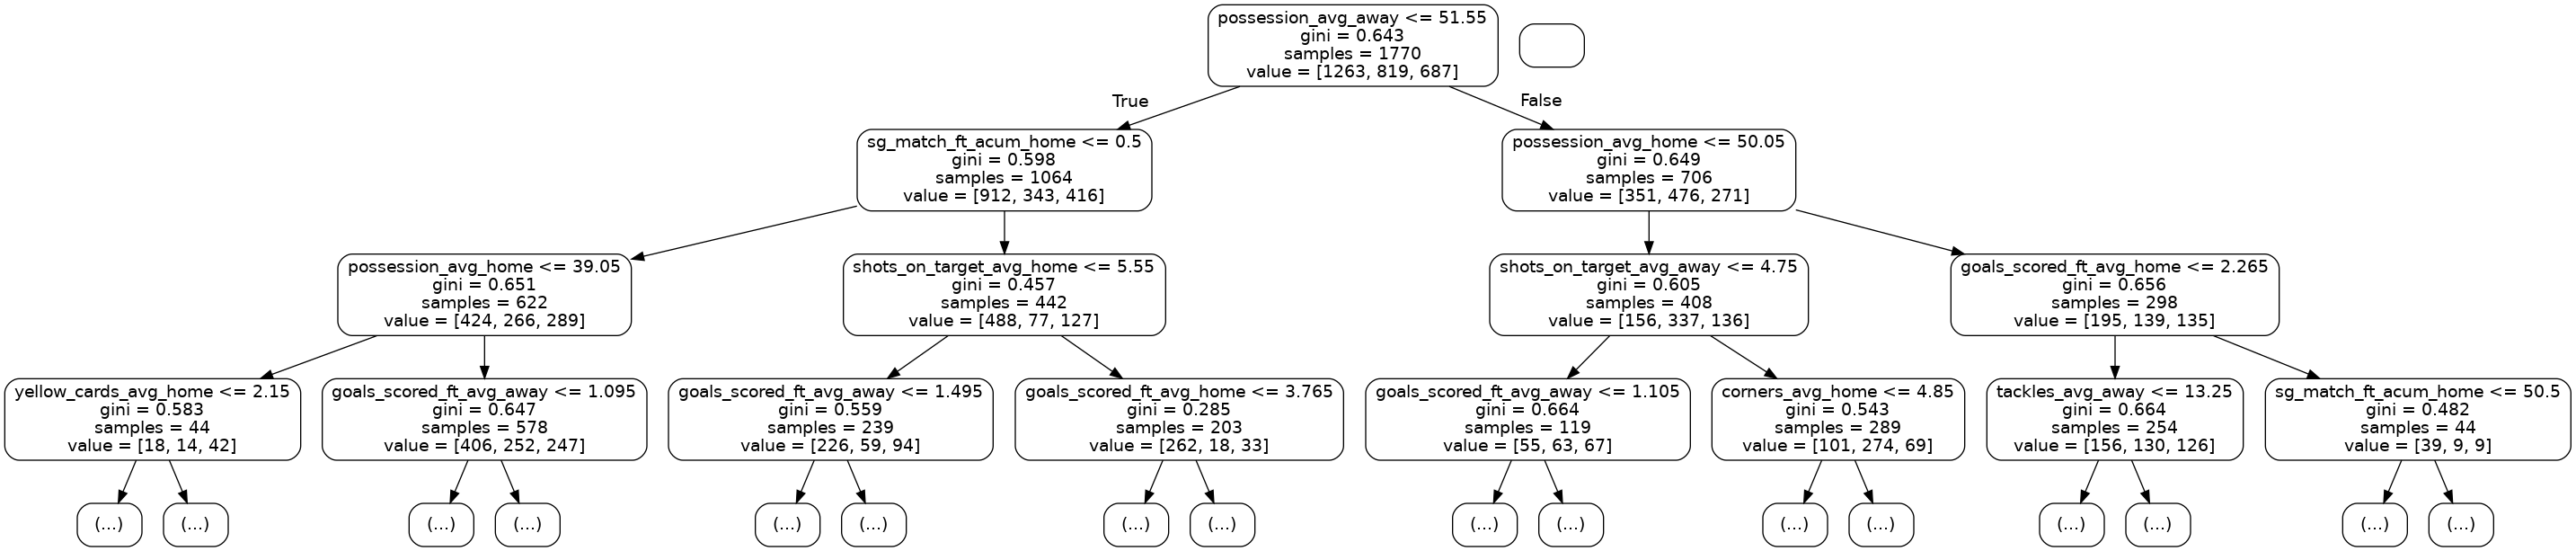

In [71]:
dot_data = export_graphviz(clf.estimators_[5], out_file=None, rounded = True, max_depth=3, feature_names=X_train.columns)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

**Written answer:** This is not a good model. It is good predicting when the home team wins but the accuracy over the other two classes is not good.

### Q2.2 - <span style="color:red">[9]</span> - What are the 5 most important variables for the best (previous) model? Create a barplot reporting their importance scores based on Gini impurity.

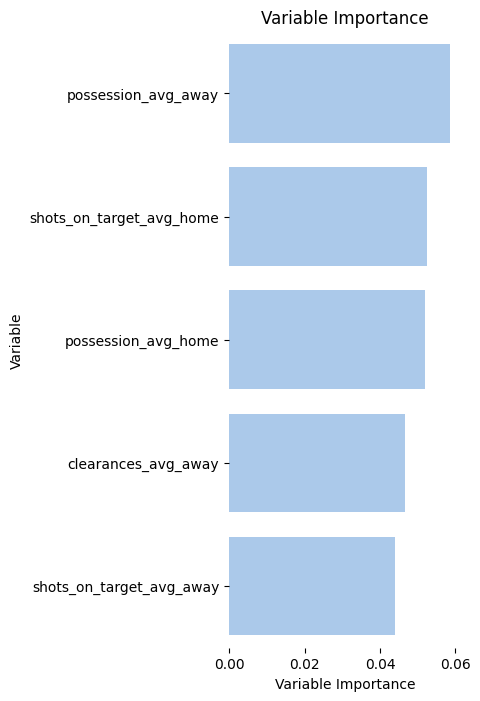

In [72]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1][:5]

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance")
sns.set_color_codes("pastel")
sns.barplot(y=[X_train.columns[i] for i in indices], 
            x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance")
sns.despine(left=True, bottom=True)

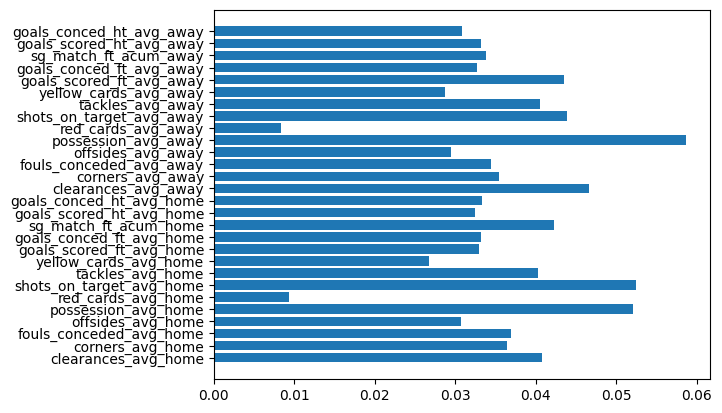

In [73]:
# FYI
plt.barh(X_train.columns, clf.feature_importances_)
plt.show()

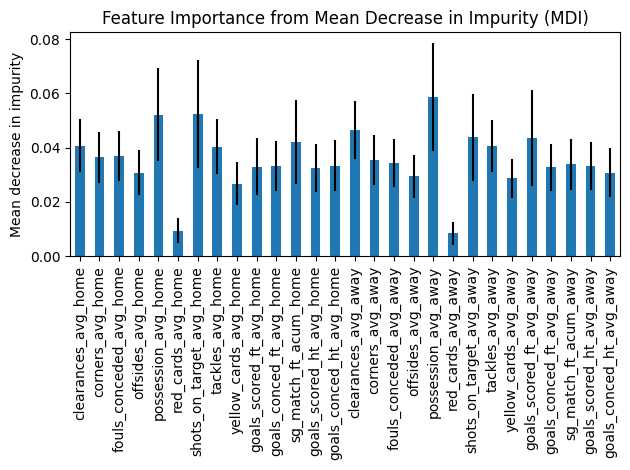

In [74]:
# FYI
# Feature Importance from Mean Decrease in Impurity (MDI)
forest_importances = pd.Series(clf.feature_importances_, index=X_train.columns)

fig, ax = plt.subplots()
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature Importance from Mean Decrease in Impurity (MDI)")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

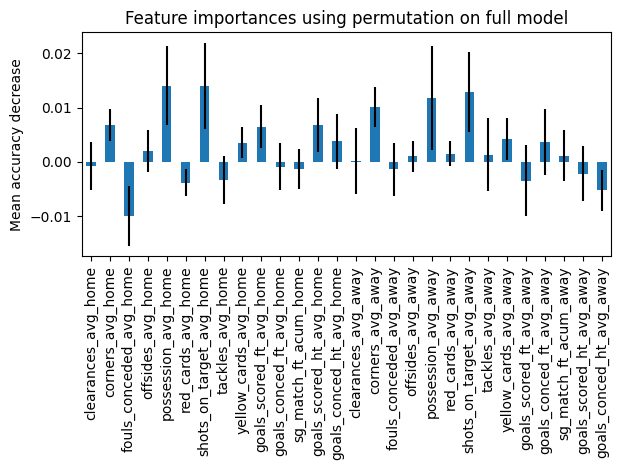

In [75]:
# FYI
# Permutation feature importance does not have a bias toward high-cardinality features and can be computed on a left-out test set.
from sklearn.inspection import permutation_importance
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=seed, n_jobs=-1)

forest_importances = pd.Series(result.importances_mean, index=X_train.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### Q3.1 - <span style="color:red">[20]</span> - XGBoosting
Now we'll repeat the process for the XGB model, using an [```XGBClassifier``` object](https://xgboost.readthedocs.io/en/latest/python/python_api.html).

1. Use cross-validated grid search (with 5 stratified validation sets) to find the best values from the lists below for `XGBClassifier`. Use only 40% of the training set for your search, otherwise it will take a long time. Take advantage of `n_jobs=-1`. Report the optimal values found per argument.
 - Number of trees: [25, 50, 100]
 - Maximum depth: [8, 25, 42]
 - Learning rate: [0.1, 0.5, 0.9]
 
2. Train a `XGBClassifier` using the optimal values and report its accuracy as well as the confusion matrix. Store the accuracy in a variable called **accuracy2**.
3. Compare the confusion matrix and the accuracy of this model with the previous one. Is the performance of XGBoost better than the RandomForestClassifier in this case?

**Points will be deducted if your answer is not in the variable mentioned above.**

**Use random_state = seed in all the methods that take this argument.**

In [76]:
param_grid = dict({'n_estimators'  : [25, 50, 100],
                   'max_depth'     : [8, 25, 42],
                   'learning_rate' : [0.1, 0.5, 0.9]
                  })

val_train = X_train.copy()
val_train['y'] = y_train.copy()
val_train = val_train.sample(frac = 0.4,          # The fraction to extract
                             random_state=seed    # The seed.
                             )

GridXGB = GridSearchCV(XGBClassifier(random_state=seed, tree_method='auto'),
                       param_grid,          
                       cv = StratifiedKFold(n_splits=5) ,
                       n_jobs = -1,         
                       refit = False         
                      )
# for the argument "tree_method" please study this:
# https://xgboost.readthedocs.io/en/stable/treemethod.html

GridXGB.fit(val_train.iloc[:, :-1], val_train['y'])

print(GridXGB.best_params_)

{'learning_rate': 0.5, 'max_depth': 25, 'n_estimators': 50}


In [77]:
# Define the XGB model # 3pts
final_XGB = XGBClassifier(*GridXGB.best_params_, tree_method='auto').fit(X_train, y_train)

# or
# final_XGB = XGBClassifier(max_depth=GridXGB.best_params_.get('max_depth'),                 # Depth of each tree
#                           learning_rate=GridXGB.best_params_.get('learning_rate'),          # How much to shrink error in each subsequent training. Trade-off with no. estimators.
#                           n_estimators=GridXGB.best_params_.get('n_estimators'),             # How many trees to use, the more the better, but decrease learning rate if many used.
#                           ).fit(X_train, y_train)

[[0.31 0.08 0.06]
 [0.11 0.13 0.06]
 [0.14 0.07 0.04]]


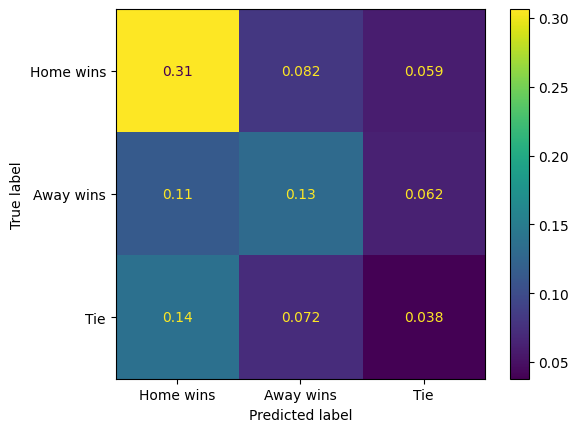

In [78]:
cm2 = confusion_matrix(y_true = y_test, y_pred = final_XGB.predict(X_test))/len(y_test) 
print(cm2.round(2))
# or
ConfusionMatrixDisplay(cm2, display_labels = ['Home wins', 'Away wins', 'Tie']).plot()
plt.show()

In [79]:
accuracy2 = accuracy_score(y_true = y_test, y_pred = final_XGB.predict(X_test))
accuracy2.round(2)

0.47

In [80]:
print(f"Accuracy Random Forest is {accuracy1.round(2)}. Accuracy XGB is {accuracy2.round(2)}.")

Accuracy Random Forest is 0.51. Accuracy XGB is 0.47.


### Q3.2 - <span style="color:red">[4]</span> - **Written question:** How would you improve the accuracy of the models? Write no more than 5 sentences.

**Written answer:** To improve the accuracy of the model we would have to improve the feature selection/extraction as we didn't really do a careful evaluation of the variables. We can also do a more refined grid search to test more possibilities.

### Q3.3 - <span style="color:red">[9]</span> - What are the 5 most important variables for the XGB classifier? Create a barplot reporting their importance scores based on Gini impurity.

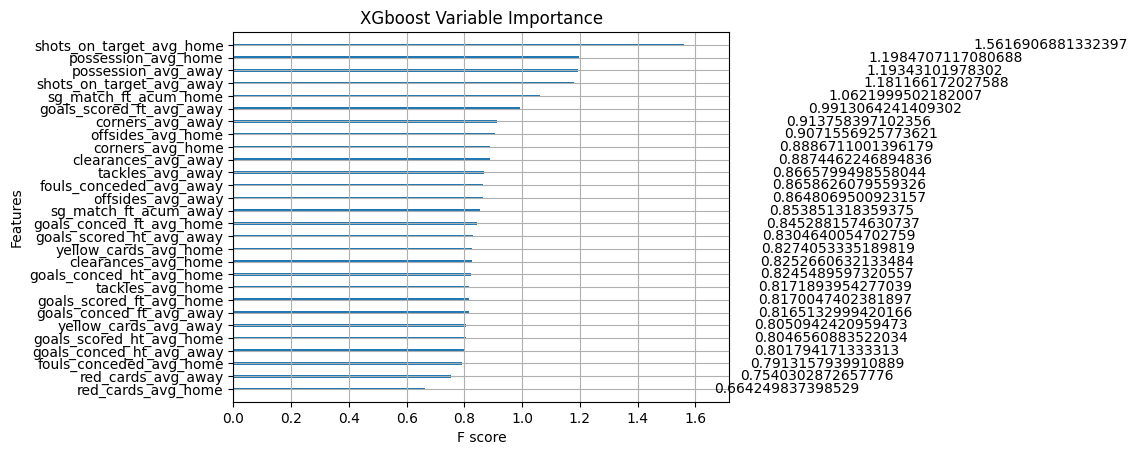

In [81]:
# options for importance_types are:
# ‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’
# Read here about them: 
# https://towardsdatascience.com/be-careful-when-interpreting-your-features-importance-in-xgboost-6e16132588e7

xgboost.plot_importance(final_XGB, importance_type="gain")
plt.title('XGboost Variable Importance')
plt.show()